# SETUP

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [4]:
from sklearn.datasets.samples_generator import make_blobs

centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=300, centers=centers, cluster_std=0.5, random_state=0)

In [7]:
from sklearn.cluster import AffinityPropagation

- s(i,k)는 다음과 같이 음의 거리로 정의되는 유사도이다.
    - s(k,k)는 특정한 음수 값으로 사용자가 정해 주게 되는데 이 값에 따라서 클러스터의 갯수가 달라지는 하이퍼 모수가 된다.  
    - s(k,k)가 크면 자기 자신에 대한 유사도가 커져서 클러스터의 수가 증가한다.

$$ s(i,k) = -|| x_i - x_k ||^2 $$ 

- - -

- preference
    - Preferences for each point - points with larger values of preferences are more likely to be chosen as exemplars. 
    - The number of exemplars, ie of clusters, is influenced by the input preferences value. 
    - If the preferences are not passed as arguments, they will be set to the median of the input similarities.


In [65]:
for i in range(0, 100):
    model = AffinityPropagation(preference=-i).fit(X)
    cluster_centers_indices = model.cluster_centers_indices_
    labels_pred = model.labels_
    n_clusters_ = len(cluster_centers_indices)
    print("Preference : %d" % i, "Estimated number of clusters : %d" % n_clusters_)

Preference : 0 Estimated number of clusters : 300
Preference : 1 Estimated number of clusters : 27
Preference : 2 Estimated number of clusters : 19
Preference : 3 Estimated number of clusters : 17
Preference : 4 Estimated number of clusters : 14
Preference : 5 Estimated number of clusters : 12
Preference : 6 Estimated number of clusters : 11
Preference : 7 Estimated number of clusters : 11
Preference : 8 Estimated number of clusters : 8
Preference : 9 Estimated number of clusters : 10
Preference : 10 Estimated number of clusters : 8
Preference : 11 Estimated number of clusters : 8
Preference : 12 Estimated number of clusters : 8
Preference : 13 Estimated number of clusters : 8
Preference : 14 Estimated number of clusters : 8
Preference : 15 Estimated number of clusters : 7
Preference : 16 Estimated number of clusters : 6
Preference : 17 Estimated number of clusters : 6
Preference : 18 Estimated number of clusters : 7
Preference : 19 Estimated number of clusters : 5
Preference : 20 Esti

In [21]:
from sklearn import metrics

In [32]:
print("Estimated number of clusters : %d" % n_clusters_)
print("Homogeneity : %0.3f" % metrics.homogeneity_score(labels_true, labels_pred))
print("Completeness : %0.3f" % metrics.completeness_score(labels_true, labels_pred))
print("V measure : %0.3f" % metrics.v_measure_score(labels_true, labels_pred))
print("Adjusted Random Index : %0.3f" % metrics.adjusted_rand_score(labels_true, labels_pred))
print("Adjusted Mutual Information : %0.3f" % metrics.adjusted_mutual_info_score(labels_true, labels_pred))
print("Silhouette Coefficient : %0.3f" % metrics.silhouette_score(X, labels_pred, metric='sqeuclidean'))

Estimated number of clusters : 3
Homogeneity : 0.872
Completeness : 0.872
V measure : 0.872
Adjusted Random Index : 0.912
Adjusted Mutual Information : 0.871
Silhouette Coefficient : 0.753


In [33]:
from itertools import cycle

In [34]:
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
colors

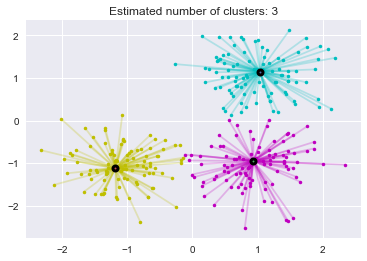

In [57]:
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col, alpha=0.25)
    plt.plot(cluster_center[0], cluster_center[1], 'o', mec='k', mew=3, markersize=5)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()